<a href="https://colab.research.google.com/github/JoDeMiro/TimeSeriesLearn/blob/main/08_TSLearn_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# k-NN search

This example performs a $k$-Nearest-Neighbor search in a database of time
series using DTW as a base metric.

To do so, we use the :class:`tslearn.neighbors.KNeighborsTimeSeries` class
which provides utilities for the $k$-Nearest-Neighbor algorithm
for time series.

[1] `Wikipedia entry for the k-nearest neighbors algorithm
<https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm>`_

[2] H. Sakoe and S. Chiba, "Dynamic programming algorithm optimization
for spoken word recognition". IEEE Transactions on Acoustics, Speech, and
Signal Processing, 26(1), 43-49 (1978).


In [1]:
!pip install -q tslearn

     |████████████████████████████████| 793 kB 7.8 MB/s 


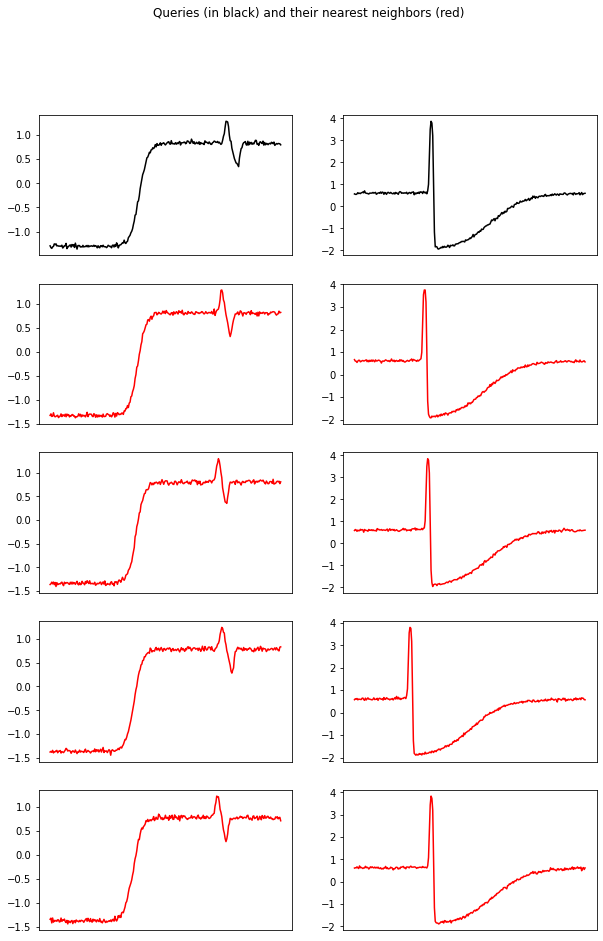

In [4]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.neighbors import KNeighborsTimeSeries
from tslearn.datasets import CachedDatasets

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

n_queries = 2
n_neighbors = 4

knn = KNeighborsTimeSeries(n_neighbors=n_neighbors)
knn.fit(X_train)
ind = knn.kneighbors(X_test[:n_queries], return_distance=False)

plt.figure(figsize=(10, 15))
for idx_ts in range(n_queries):
    plt.subplot(n_neighbors + 1, n_queries, idx_ts + 1)
    plt.plot(X_test[idx_ts].ravel(), "k-")
    plt.xticks([])
    for rank_nn in range(n_neighbors):
        plt.subplot(n_neighbors + 1, n_queries,
                    idx_ts + (n_queries * (rank_nn + 1)) + 1)
        plt.plot(X_train[ind[idx_ts, rank_nn]].ravel(), "r-")
        plt.xticks([])


plt.suptitle("Queries (in black) and their nearest neighbors (red)")
plt.show()